In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('train.csv')

In [3]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


# Performing EDA to check missing values

<AxesSubplot:>

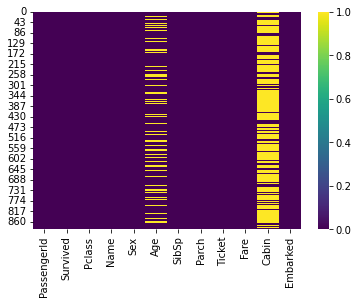

In [4]:
sns.heatmap(data.isnull(),cbar=True,cmap='viridis')

In [5]:
data.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

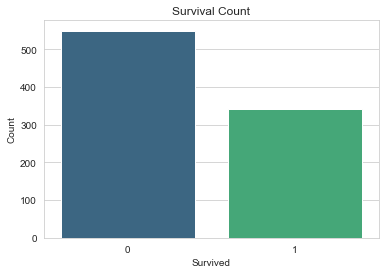

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=data,palette='viridis')

plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survival Count')
plt.show()

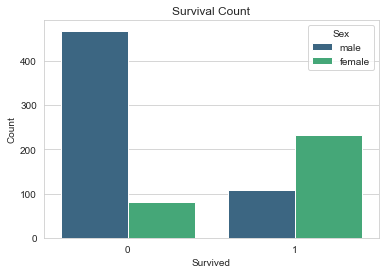

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=data,palette='viridis')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survival Count')
plt.show()

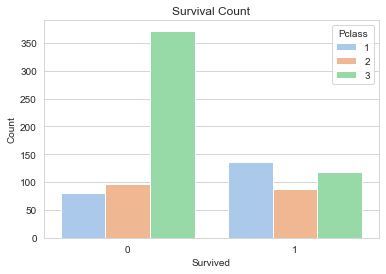

In [8]:
sns.countplot(x='Survived',hue='Pclass',data=data,palette='pastel')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survival Count')
plt.show()

<AxesSubplot:>

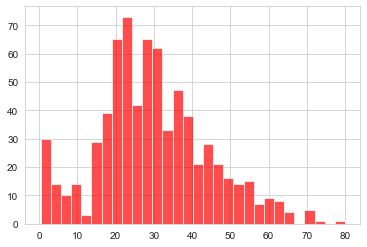

In [9]:
data['Age'].hist(bins=30,color='red',alpha=0.7)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

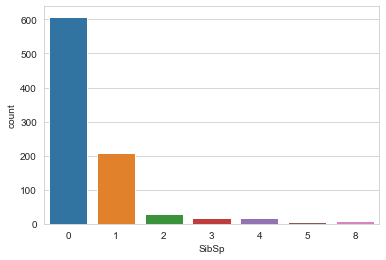

In [10]:
sns.countplot(x='SibSp',data=data)

<AxesSubplot:xlabel='Parch', ylabel='count'>

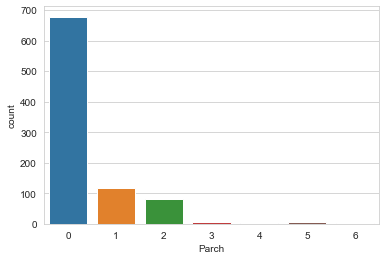

In [11]:
sns.countplot(x='Parch',data=data)

<AxesSubplot:>

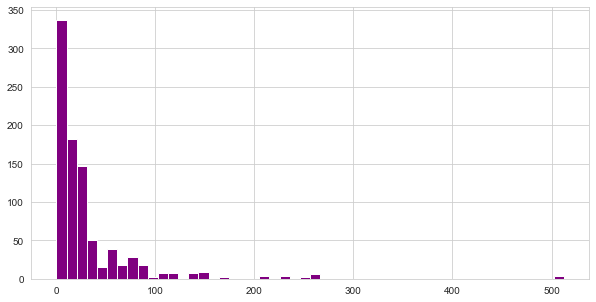

In [12]:
data['Fare'].hist(color='purple',bins=50,figsize=(10,5))

# Data Cleaning
We will fill in missing age data instead of just dropping the missing age data rows. 
We will fill mean age of all the passengers (imputation). 
We can also check the average age by passenger class.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

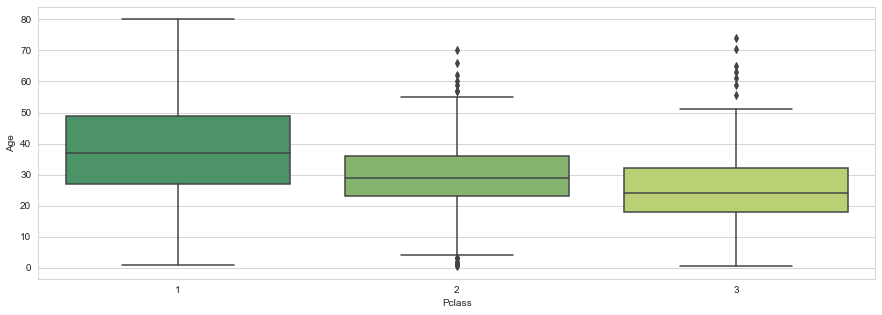

In [13]:
plt.figure(figsize=(15, 5))
sns.boxplot(x='Pclass',y='Age',data=data,palette='summer')

 We can clearly see that the maximum passengers in higher class are of the elder age group

In [14]:
def avg_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 36

        elif Pclass == 2:
            return 30

        else:
            return 25

    else:
        return Age

In [15]:
data['Age'] = data[['Age','Pclass']].apply(avg_age,axis=1)

In [16]:
data['Embarked'] = data['Embarked'].fillna('S')

<AxesSubplot:>

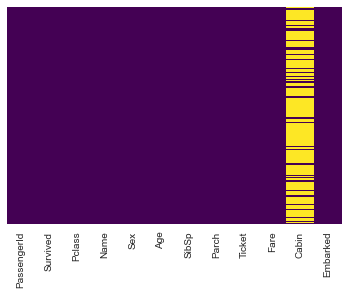

In [17]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [18]:
# Hence we have dealt with the missing values

Now we will move towards Cabin Column

In [19]:
data.drop('Cabin',axis=1,inplace=True)

In [20]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [21]:
data.dropna(inplace=True)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


Convert the categorical feature to some dummy variables

In [23]:
sex = pd.get_dummies(data['Sex'],drop_first=True)
embark = pd.get_dummies(data['Embarked'],drop_first=True)

In [24]:
data.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [25]:
data = pd.concat([data,sex,embark],axis=1)
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


# Logistic Regression Model

Splitting data into training and testing data

In [26]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['Survived'],axis=1), 
                                                    data['Survived'], test_size=0.20, 
                                                    random_state=201)

Training

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

In [60]:
predictions = model.predict(X_test)
X_test.head()

C:\Users\Kanan\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
469,470,3,0.75,2,1,19.2583,0,0,0
22,23,3,15.00,0,0,8.0292,0,1,0
536,537,1,45.00,0,0,26.5500,1,0,1
644,645,3,0.75,2,1,19.2583,0,0,0
502,503,3,25.00,0,0,7.6292,0,1,0


In [61]:
predictions

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1], dtype=int64)

Evaluating the predictions

In [62]:
from sklearn.metrics import confusion_matrix, classification_report

In [63]:
confusion_matrix(y_test,predictions)

array([[28, 81],
       [14, 56]], dtype=int64)

In [64]:
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.67      0.26      0.37       109
           1       0.41      0.80      0.54        70

    accuracy                           0.47       179
   macro avg       0.54      0.53      0.46       179
weighted avg       0.57      0.47      0.44       179



# Decision Tree

In [66]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [69]:
dt_predict = dt_model.predict(X_test)

In [70]:
confusion_matrix(y_test,dt_predict)

array([[95, 14],
       [29, 41]], dtype=int64)

In [71]:
print(classification_report(y_test,dt_predict))


              precision    recall  f1-score   support

           0       0.77      0.87      0.82       109
           1       0.75      0.59      0.66        70

    accuracy                           0.76       179
   macro avg       0.76      0.73      0.74       179
weighted avg       0.76      0.76      0.75       179

